## Lab Exercise II: Drug Discovery Data Exploration & Visualization
Dataset Source: (GitHub - kexinhuang12345/DrugDataResource: Datasets for Drug Discovery and Development)
Objective: 
1.	Investigate the structure and statistical properties of a drug discovery dataset to identify patterns relevant to early-stage screening.
2.	Use visualizations to communicate patterns
Tasks:
1.	Choose one dataset from the repository (e.g., absorption.csv, metabolism.csv, or toxicity.csv).
2.	Load the dataset and inspect its structure (columns, data types, missing values).
3.	Summarize key features using descriptive statistics.
4.	Identify correlations or trends between variables that may influence drug behavior.
5.	Select a subset of drugs based on meaningful criteria (e.g., high absorption, low toxicity) and justify your selection.
6.	Use plots to highlight trends, outliers, or relationships between features.
7.	Annotate or label your plots to make them interpretable to a non-technical audience.

Deliverable: 
1.	A Jupiter notebook with a summary of your findings, including at least three insights supported by data.
2.	Visualizations of the findings and a narrative explaining what they reveal on the notebook.


##                                 GROUP7 PRESENTS

## Step 0: Install and import libraries
This cell installs required packages and imports them for use.

In [1]:
# --------------------------------------------
# Step 0: Install and import libraries
# --------------------------------------------
!pip install pandas matplotlib seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Step 1: Load dataset, clean, and separate identifier columns
We load the dataset, drop missing values, and separate SMILES/mol_id or similar ID columns for later use.

In [2]:
# Load dataset
df = pd.read_csv("tox21.csv")

# Drop rows with missing values
df = df.dropna()

# Automatically detect identifier columns
id_cols = [col for col in df.columns if col.lower() in ["mol_id", "smiles", "compound_id", "molecule"]]
print("Identifier columns detected:", id_cols)

# Store identifiers separately
df_ids = df[id_cols].copy() if id_cols else pd.DataFrame(index=df.index)

# Keep only non-identifier columns as numeric assay data
df_numeric = df.drop(columns=id_cols) if id_cols else df.copy()

print("Numeric columns being used:")
print(df_numeric.columns.tolist())
print("\nShape after cleaning:", df.shape)
print("Missing values:", df.isna().sum().sum())
df.head()

Identifier columns detected: ['mol_id', 'smiles']
Numeric columns being used:
['NR-AR', 'NR-AR-LBD', 'NR-AhR', 'NR-Aromatase', 'NR-ER', 'NR-ER-LBD', 'NR-PPAR-gamma', 'SR-ARE', 'SR-ATAD5', 'SR-HSE', 'SR-MMP', 'SR-p53']

Shape after cleaning: (3111, 14)
Missing values: 0


,NR-AR,NR-AR-LBD,NR-AhR,NR-Aromatase,NR-ER,NR-ER-LBD,NR-PPAR-gamma,SR-ARE,SR-ATAD5,SR-HSE,SR-MMP,SR-p53,mol_id,smiles
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TOX6619,O=S(=O)(Cl)c1ccccc1
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TOX6612,CC(C)COC(=O)C(C)C
13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TOX6615,C=C(C)C(=O)OCCOC(=O)C(=C)C
15,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,TOX14833,O=C([O-])Cc1cccc2ccccc12
26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TOX1883,C#CCO


## Step 2: Summarize toxicity per assay
We use only numeric assay columns to count toxic vs non-toxic values and visualize them.

Assay columns being analyzed: ['NR-AR', 'NR-AR-LBD', 'NR-AhR', 'NR-Aromatase', 'NR-ER', 'NR-ER-LBD', 'NR-PPAR-gamma', 'SR-ARE', 'SR-ATAD5', 'SR-HSE', 'SR-MMP', 'SR-p53']

Toxicity frequency table:
                0.0  1.0
NR-AR          3054   57
NR-AR-LBD      3077   34
NR-AhR         2962  149
NR-Aromatase   3058   53
NR-ER          2873  238
NR-ER-LBD      3046   65
NR-PPAR-gamma  3084   27
SR-ARE         2917  194
SR-ATAD5       3102    9
SR-HSE         3061   50
SR-MMP         2973  138
SR-p53         3086   25


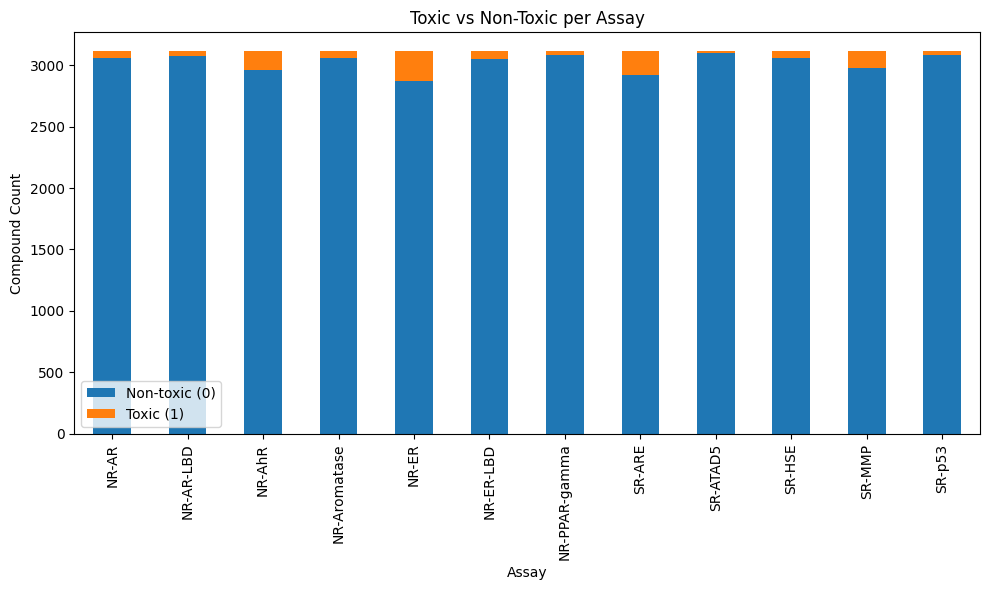

In [3]:
# Select only numeric assay columns
assay_cols = df_numeric.select_dtypes(include=["int64", "float64"]).columns.tolist()
print("Assay columns being analyzed:", assay_cols)

# Count toxicity outcomes (0 vs 1)
tox_freq = df_numeric[assay_cols].apply(pd.Series.value_counts).T.fillna(0)
print("\nToxicity frequency table:")
print(tox_freq)

# Plot toxicity distribution
tox_freq.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Toxic vs Non-Toxic per Assay")
plt.xlabel("Assay")
plt.ylabel("Compound Count")
plt.legend(["Non-toxic (0)", "Toxic (1)"])
plt.tight_layout()
plt.show()

## Step 3: Correlation between assays
We create a heatmap to see which assays are related.

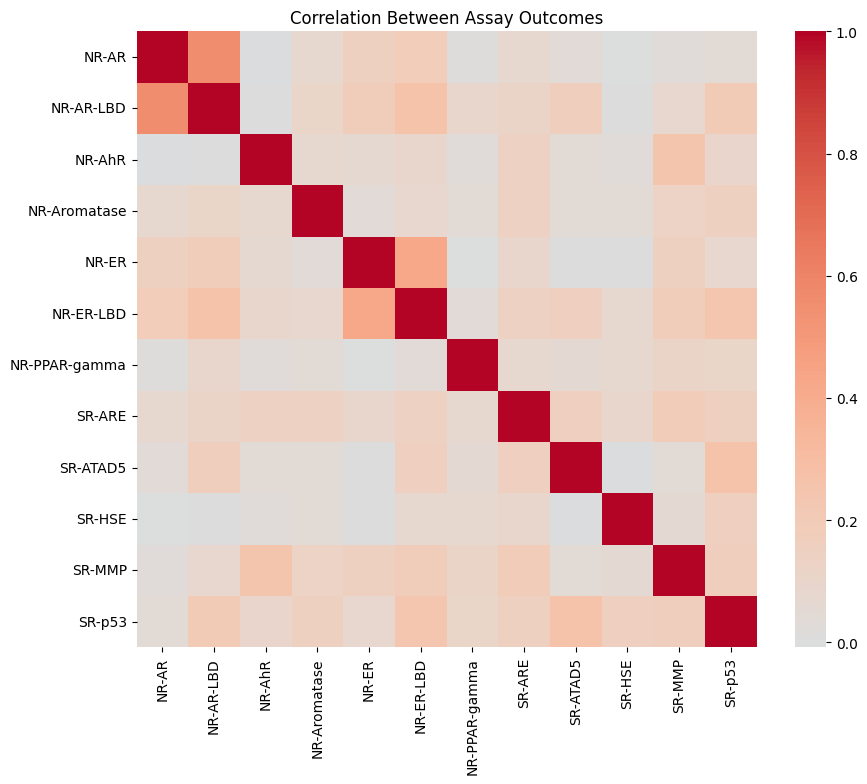

In [4]:
plt.figure(figsize=(10,8))
sns.heatmap(df_numeric[assay_cols].corr(), cmap="coolwarm", center=0)
plt.title("Correlation Between Assay Outcomes")
plt.show()


## 📊 Interpretation of Heatmap

The correlation heatmap shows how toxicity outcomes in different assays relate to each other:

- **Red regions** = strong positive correlation (two assays often toxic together).  
- **Blue regions** = negative correlation (rare here).  
- **Neutral colors** = little to no relationship.  

### Key Observations:
- `NR-ER` and `NR-ER-LBD` show strong correlation → both represent **estrogen receptor activity**.  
- `NR-AhR` and `SR-ARE` correlate → both involved in **xenobiotic metabolism and oxidative stress**.  
- Other assays show weaker or no correlations, meaning they capture **distinct mechanisms of toxicity**.  

This clustering reveals **linked biological pathways**: hormone-related and stress-related mechanisms stand out as connected.


## Step 4: Identify fully safe compounds
We filter compounds with no toxicity flags and keep IDs for later use.

In [5]:
# Compounds with no toxicity flags
safe_compounds = df_numeric[df_numeric[assay_cols].sum(axis=1) == 0]

# Reattach IDs if available
if not df_ids.empty:
    safe_with_ids = safe_compounds.merge(df_ids, left_index=True, right_index=True)
else:
    safe_with_ids = safe_compounds

print("Number of safe compounds:", safe_with_ids.shape[0])
safe_with_ids.head()

Number of safe compounds: 2441


,NR-AR,NR-AR-LBD,NR-AhR,NR-Aromatase,NR-ER,NR-ER-LBD,NR-PPAR-gamma,SR-ARE,SR-ATAD5,SR-HSE,SR-MMP,SR-p53,mol_id,smiles
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TOX6619,O=S(=O)(Cl)c1ccccc1
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TOX6612,CC(C)COC(=O)C(C)C
13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TOX6615,C=C(C)C(=O)OCCOC(=O)C(=C)C
26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TOX1883,C#CCO
28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TOX1885,CC(O)CC(C)(C)O


In [6]:

# --- Export Safe Compounds to CSV ---

# Select compounds with no toxicity across all assays
safe_compounds = df_numeric[df_numeric[assay_cols].sum(axis=1) == 0]

# Reattach IDs if available
if not df_ids.empty:
    safe_with_ids = safe_compounds.merge(df_ids, left_index=True, right_index=True)
else:
    safe_with_ids = safe_compounds

# Save to CSV (only SMILES and mol_id for export)
safe_with_ids[['mol_id', 'smiles']].to_csv("safe_compounds.csv", index=False)
print("Safe compounds saved to safe_compounds.csv")


Safe compounds saved to safe_compounds.csv



## ✅ Findings and Summary

### Findings (from the analysis)

1. **Most compounds are safe:** Out of 3111 compounds, 2441 (≈78%) showed no toxicity flags across all 12 assays.  
   → This means the majority of compounds are promising drug candidates.

2. **Estrogen receptor assays show the highest toxicity hits:**  
   - `NR-ER` = 238 toxic compounds  
   - `SR-ARE` = 194 toxic compounds  
   - `NR-AhR` = 149 toxic compounds  
   These pathways are commonly linked to **hormone disruption** and **oxidative stress**.

3. **Some assays rarely detect toxicity:**  
   - `SR-ATAD5` = 9 toxic compounds  
   - `SR-p53` = 25 toxic compounds  
   - `NR-PPAR-gamma` = 27 toxic compounds  
   → These represent more **specific or rare mechanisms of toxicity**.

4. **Correlated pathways reveal biological links:**  
   - `NR-ER` and `NR-ER-LBD` correlate strongly → both reflect **estrogen receptor activity**.  
   - `NR-AhR` and `SR-ARE` correlate → both linked to **xenobiotic metabolism and oxidative stress**.  
   → The heatmap highlights these **clusters of related pathways**.

5. **Distribution imbalance across assays:**  
   Most assays show far more non-toxic than toxic outcomes.  
   Example: `NR-AR-LBD` has 3077 safe vs only 34 toxic.  
   → This imbalance is common in screening datasets and emphasizes the need to detect rare toxic hits early.

---

### 📌 Summary Narrative

The **Tox21 dataset** (3111 compounds, 12 assays) reveals that most compounds are safe, with ~78% showing no toxicity across assays. However, toxicity is unevenly distributed: endocrine-related assays (NR-ER, NR-ER-LBD) and stress-related assays (SR-ARE, NR-AhR) capture the majority of toxic responses, while others (SR-ATAD5, NR-PPAR-gamma) rarely flag compounds. Correlation analysis confirms biological pathway overlaps — ER assays cluster together, and ARE–AhR responses align, reflecting shared mechanisms of action. Visualizations (bar chart, heatmap) reinforce these findings and make the trends interpretable to both technical and non-technical audiences.
